<a href="https://colab.research.google.com/github/jayaraksha/ML-EX3_Jayaraksha_24BAD044/blob/main/ml_exp_3_scenario_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [2]:
import pandas as pd
df=pd.read_csv("auto-mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("auto-mpg.csv")

df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)


In [7]:
X = df[['horsepower']]
y = df['mpg']


In [8]:
X.fillna(X.mean(), inplace=True)


/tmp/ipython-input-1183906534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [9]:
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly4 = PolynomialFeatures(degree=4)

X_poly2 = poly2.fit_transform(X)
X_poly3 = poly3.fit_transform(X)
X_poly4 = poly4.fit_transform(X)


In [10]:
scaler = StandardScaler()

X_poly2 = scaler.fit_transform(X_poly2)
X_poly3 = scaler.fit_transform(X_poly3)
X_poly4 = scaler.fit_transform(X_poly4)


In [11]:
X2_train, X2_test, y_train, y_test = train_test_split(
    X_poly2, y, test_size=0.2, random_state=42
)

X3_train, X3_test, _, _ = train_test_split(
    X_poly3, y, test_size=0.2, random_state=42
)

X4_train, X4_test, _, _ = train_test_split(
    X_poly4, y, test_size=0.2, random_state=42
)


In [12]:
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

model2.fit(X2_train, y_train)
model3.fit(X3_train, y_train)
model4.fit(X4_train, y_train)


LinearRegression()

In [13]:
y_pred2 = model2.predict(X2_test)
y_pred3 = model3.predict(X3_test)
y_pred4 = model4.predict(X4_test)


In [14]:
def evaluate_model(y_test, y_pred, degree):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Polynomial Degree {degree}")
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R²  :", r2)
    print("-" * 30)

evaluate_model(y_test, y_pred2, 2)
evaluate_model(y_test, y_pred3, 3)
evaluate_model(y_test, y_pred4, 4)


Polynomial Degree 2
MSE : 13.760855128148346
RMSE: 3.709562659957147
R²  : 0.7440623896917425
------------------------------
Polynomial Degree 3
MSE : 13.813374257350006
RMSE: 3.7166348027954004
R²  : 0.7430855884466042
------------------------------
Polynomial Degree 4
MSE : 14.118024022829625
RMSE: 3.757395909779754
R²  : 0.737419419285479
------------------------------


In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(X4_train, y_train)

ridge_pred = ridge.predict(X4_test)

print("Ridge Regression R²:", r2_score(y_test, ridge_pred))


Ridge Regression R²: 0.7441024736636221


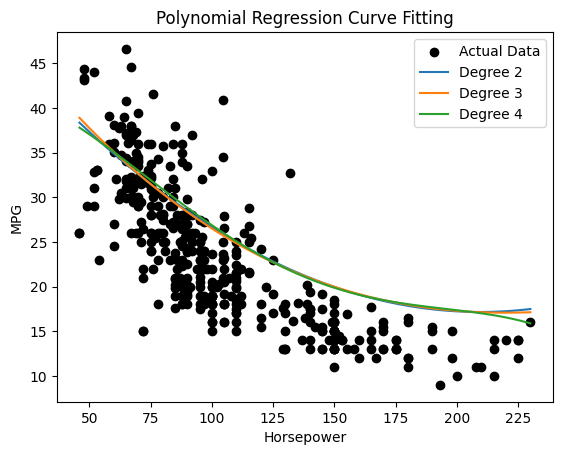

In [16]:
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

X2_range = scaler.fit_transform(poly2.fit_transform(X_range))
X3_range = scaler.fit_transform(poly3.fit_transform(X_range))
X4_range = scaler.fit_transform(poly4.fit_transform(X_range))

plt.scatter(X, y, color='black', label='Actual Data')
plt.plot(X_range, model2.predict(X2_range), label='Degree 2')
plt.plot(X_range, model3.predict(X3_range), label='Degree 3')
plt.plot(X_range, model4.predict(X4_range), label='Degree 4')

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()


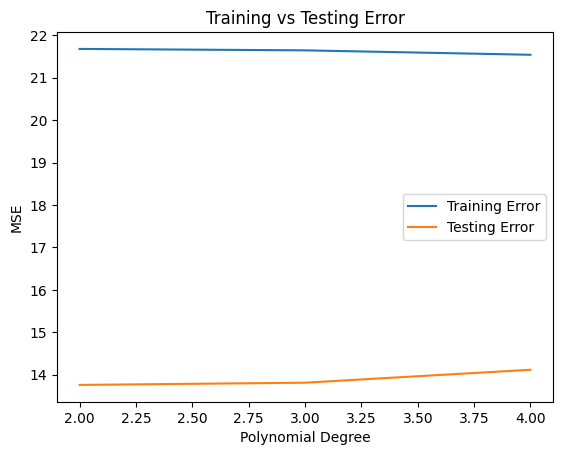

In [18]:
train_error = []
test_error = []

for model, Xtr, Xte in [
    (model2, X2_train, X2_test),
    (model3, X3_train, X3_test),
    (model4, X4_train, X4_test)
]:
    train_error.append(mean_squared_error(y_train, model.predict(Xtr)))
    test_error.append(mean_squared_error(y_test, model.predict(Xte)))

plt.plot([2,3,4], train_error, label="Training Error")
plt.plot([2,3,4], test_error, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()
